Import library


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load data dengan encoding latin1


In [2]:
data = pd.read_csv('data.csv', encoding='latin1')

Melihat 5 baris pertama pada data


In [3]:
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


Melihat ringkasan data


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


Mengecek Missing Value


In [5]:
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Menampilkan baris yang memiliki missing value


In [6]:
missing_data = data[data.isnull().any(axis=1)]
print(missing_data.head())

     InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

          InvoiceDate  UnitPrice  CustomerID         Country  
622   12/1/2010 11:52       0.00         NaN  United Kingdom  
1443  12/1/2010 14:32       2.51         NaN  United Kingdom  
1444  12/1/2010 14:32       2.51         NaN  United Kingdom  
1445  12/1/2010 14:32       0.85         NaN  United Kingdom  
1446  12/1/2010 14:32       1.66         NaN  United Kingdom  


Mengecek nilai duplikat


In [7]:
duplikat = data.duplicated().sum()
print(f'Jumlah duplikat :{duplikat}')

# menampilkan baris duplikat (jika ada)
if(duplikat > 0):
    print(data[data.duplicated()].head())

Jumlah duplikat :5268
    InvoiceNo StockCode                        Description  Quantity  \
517    536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527    536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537    536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539    536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555    536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   

         InvoiceDate  UnitPrice  CustomerID         Country  
517  12/1/2010 11:45       1.25     17908.0  United Kingdom  
527  12/1/2010 11:45       2.10     17908.0  United Kingdom  
537  12/1/2010 11:45       2.95     17908.0  United Kingdom  
539  12/1/2010 11:45       4.95     17908.0  United Kingdom  
555  12/1/2010 11:49       2.95     17920.0  United Kingdom  


Mengecek nilai negatif


In [10]:
# mengecek quantitiy negatif value
quantity_negative = data[data['Quantity'] < 0]
print(f'Jumlah transaksi dengan quantity negatif : {quantity_negative}')
print(quantity_negative.head())

# mengecek unit price negatif atau nol
unitprice_salah = data[data['UnitPrice'] <= 0]
print(f'Jumlah transaksi dengan unit price <= 0 : {unitprice_salah}')
print(unitprice_salah.head())

Jumlah transaksi dengan quantity negatif :        InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country  
141

Cek inkonsistensi data


In [11]:
# mengecek apakah ada transaksi yang Quantity > 0 tetapi deskripsi kosong
deskripsi_kosong = data[(data['Description'].isnull()) & (data['Quantity']>0)]
print(f'Jumlah transaksi dengan Deskripsi kosong tetapi Quantity > 0 :{deskripsi_kosong}')
print(deskripsi_kosong.head())

Jumlah transaksi dengan Deskripsi kosong tetapi Quantity > 0 :       InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
622       536414     22139         NaN        56  12/1/2010 11:52        0.0   
1970      536545     21134         NaN         1  12/1/2010 14:32        0.0   
1971      536546     22145         NaN         1  12/1/2010 14:33        0.0   
1972      536547     37509         NaN         1  12/1/2010 14:33        0.0   
1987      536549    85226A         NaN         1  12/1/2010 14:34        0.0   
...          ...       ...         ...       ...              ...        ...   
533712    581103     22689         NaN         4  12/7/2011 11:58        0.0   
535326    581203     23406         NaN        15  12/7/2011 18:31        0.0   
535332    581209     21620         NaN         6  12/7/2011 18:35        0.0   
536981    581234     72817         NaN        27  12/8/2011 10:33        0.0   
538554    581408     85175         NaN        20  12/8/201

Memeriksa outlier sederhana


In [13]:
# mengecek statisitk deskriptif Quantity dan UnitPrice
print(data[['Quantity', 'UnitPrice']].describe())


# menampilkan transaksi dengan Quantity sangat besar, misalnya di atas 10.000
outlier_quantity = data[data['Quantity'] > 10000]
print(f'Jumlah transaksi dengan Quantity > 10.000 : {outlier_quantity}')
print(outlier_quantity.head())


# menampilkan transaksi dengan UnitPrice sangat besar, misalnya di atas 1,000
outlier_price = data[data['UnitPrice'] > 1000]
print(f'Jumlah transaksi dengan unit price  > 1.000 : {outlier_price}')
print(outlier_price.head())

            Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000
Jumlah transaksi dengan Quantity > 10.000 :        InvoiceNo StockCode                     Description  Quantity  \
61619     541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
502122    578841     84826  ASSTD DESIGN 3D PAPER STICKERS     12540   
540421    581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

             InvoiceDate  UnitPrice  CustomerID         Country  
61619    1/18/2011 10:01       1.04     12346.0  United Kingdom  
502122  11/25/2011 15:57       0.00     13256.0  United Kingdom  
540421    12/9/2011 9:15       2.08     16446.0  United Kingdom  
       InvoiceNo StockCode                     Description  Quantity  \
61619  

DATA CLEANING


In [14]:
# menghapus baris dengan nilai null pada kolom CustomerID dan DEscription
data_clean = data.dropna(subset=['CustomerID', 'Description'])

# menghapus transaksi dengan Quantity Negatif (retur barang)
data_clean = data_clean[data_clean['Quantity'] > 0]

# Konversi kolom invoiceDate ke datetime
data_clean['InvoiceDate'] = pd.to_datetime(data_clean['InvoiceDate'])

# mengecek data setelah pembersihan
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB
None


Buat fitur baru : Total Harga Per Transaksi


In [16]:
data_clean['TotalPrice'] = data_clean['Quantity'] * data_clean['UnitPrice']

# melihat hasil
print(data_clean[['Quantity', 'UnitPrice', 'TotalPrice']].head())

   Quantity  UnitPrice  TotalPrice
0         6       2.55       15.30
1         6       3.39       20.34
2         8       2.75       22.00
3         6       3.39       20.34
4         6       3.39       20.34


ANALISIS PENJUALAN


Analisis Penjualan Keseluruhan


In [ ]:
total_penjualan = data_clean['TotalPrice'].sum()
print(f'Total Penjualan keseluruhan : {total_penjualan}')

Total Penjualan keseluruhan : 8911407.904


Penjualan berdasarkan negara


In [19]:
penjualan_negara = data_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

print(penjualan_negara.head(10))

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: TotalPrice, dtype: float64


Produk terlaris berdasarkan jumlah


In [20]:
produk_terlaris = data_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

print(produk_terlaris.head(10))

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


Tren penjualan per bulan


In [21]:
data_clean['Month'] = data_clean['InvoiceDate'].dt.month
penjualan_bulanan = data_clean.groupby('Month')['TotalPrice'].sum()

print(penjualan_bulanan)

Month
1      569445.040
2      447137.350
3      595500.760
4      469200.361
5      678594.560
6      661213.690
7      600091.011
8      645343.900
9      952838.382
10    1039318.790
11    1161817.380
12    1090906.680
Name: TotalPrice, dtype: float64


VISUALISASI DATA


Grafik penjualan berdasarkan negara


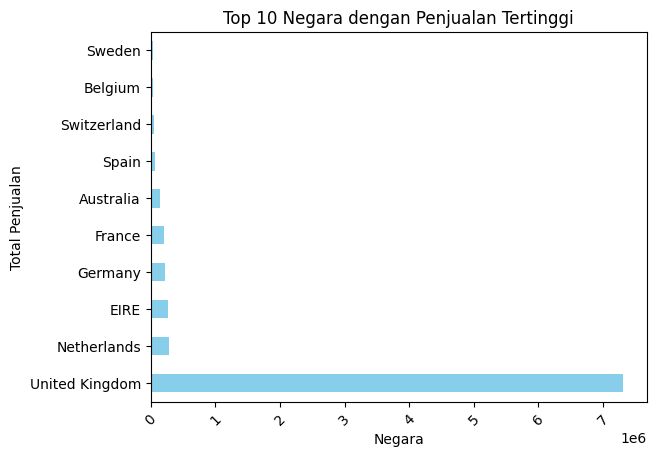

In [27]:
plt.Figure(figsize=(10,6))
penjualan_negara.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Negara dengan Penjualan Tertinggi')
plt.xlabel('Negara')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

Grafik penjualan produk terlaris


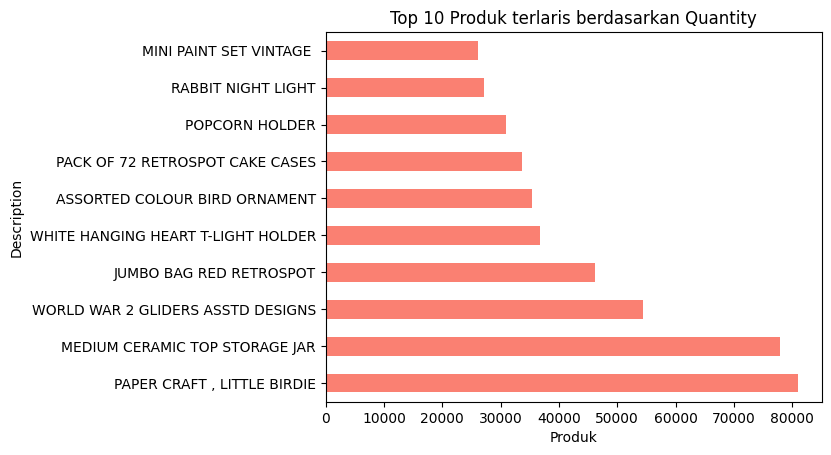

In [26]:
plt.Figure(figsize=(10,6))
produk_terlaris.head(10).plot(kind='barh', color='salmon')
plt.title('Top 10 Produk terlaris berdasarkan Quantity')
plt.xlabel('Jumlah Penjualan')
plt.xlabel('Produk')
plt.show()

Grafik penjualan per bulan


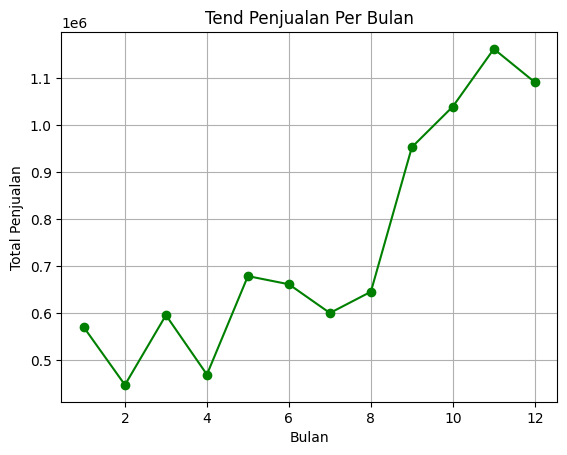

In [28]:
plt.Figure(figsize=(10,6))
penjualan_bulanan.plot(marker='o', color='green')
plt.title('Tend Penjualan Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.show()